In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
np.random.seed(123)

In [21]:
!wget 'https://covid.ourworldindata.org/data/owid-covid-data.csv' -O 'COVID_world.csv'

--2022-09-16 02:57:03--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.138, 104.21.233.137, 2606:4700:3038::6815:e98a, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘COVID_world.csv’

COVID_world.csv         [    <=>             ]  58.59M  93.8MB/s    in 0.6s    

2022-09-16 02:57:04 (93.8 MB/s) - ‘COVID_world.csv’ saved [61438886]



In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#Leemos el data set de COVID con Pandas
dataCovid = pd.read_csv('COVID_world.csv')

In [24]:
#Observamos los 10 primeros registros el dataframe
dataCovid[:10]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [25]:
#observamos los paises que estan en el dataframe
dataCovid['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

#Buscamos los paises que analizaremos

In [26]:
posDataGU = dataCovid['location'].str.contains('Guatemala')
dataCovidGU = dataCovid[posDataGU]
dataCovidGU[:-5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
79143,GTM,North America,Guatemala,2020-02-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
79144,GTM,North America,Guatemala,2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
79145,GTM,North America,Guatemala,2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
79146,GTM,North America,Guatemala,2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
79147,GTM,North America,Guatemala,2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80074,GTM,North America,Guatemala,2022-09-05,1105036.0,127.0,958.429,19567.0,15.0,15.286,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
80075,GTM,North America,Guatemala,2022-09-06,1106153.0,1117.0,816.571,19584.0,17.0,16.000,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
80076,GTM,North America,Guatemala,2022-09-07,1107533.0,1380.0,797.000,19603.0,19.0,16.143,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
80077,GTM,North America,Guatemala,2022-09-08,1108779.0,1246.0,739.000,19626.0,23.0,16.000,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN


In [27]:
fecha_GU = dataCovidGU['date']
N_GU = np.shape(np.ravel(fecha_GU))
N_GU= N_GU[0]
x_GU = np.linspace(0, N_GU, N_GU) 

new_cases_GU =  dataCovidGU['new_cases']
new_deaths_GU = dataCovidGU['new_deaths']
new_cases_smooth_GU =  dataCovidGU['new_cases_smoothed']
new_deaths_smooth_GU =  dataCovidGU['new_deaths_smoothed']
new_deaths_per_millon_GU = dataCovidGU['new_deaths_per_million']
new_cases_per_millon_GU = dataCovidGU['new_cases_per_million']

In [29]:
print(new_deaths_GU.max())

102.0


Text(0.5, 1.0, 'New Deaths per Millon')

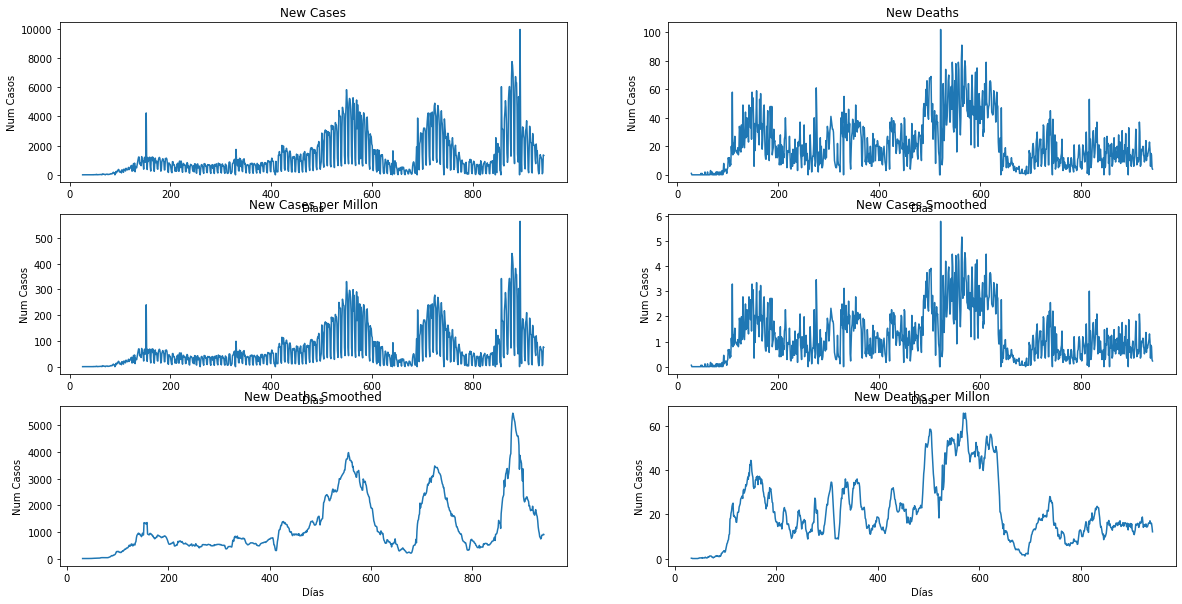

In [30]:
plt.figure(figsize=(20, 10))
plt.subplot(3, 2, 1),plt.plot(x_GU, new_cases_GU)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Cases')
plt.subplot(3, 2, 2),plt.plot(x_GU, new_deaths_GU)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Deaths')
plt.subplot(3, 2, 3),plt.plot(x_GU, new_cases_per_millon_GU)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Cases per Millon')
plt.subplot(3, 2, 4),plt.plot(x_GU, new_deaths_per_millon_GU)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Cases Smoothed')
plt.subplot(3, 2, 5),plt.plot(x_GU, new_cases_smooth_GU)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Deaths Smoothed')
plt.subplot(3, 2, 6),plt.plot(x_GU, new_deaths_smooth_GU)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Deaths per Millon')

In [31]:
from ipywidgets import interact
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
def polyFBase(obs, M):
  idx = np.linspace(0, M-1, M)
  phi_x = np.power(obs, idx)
  return phi_x

def expFBase(obs, M):
  mu_s = np.linspace(0, 919, M) #CR=919, IS=934 NO=929
  s2 = 0.5
  phi_x = np.zeros_like(mu_s)
  for m in range(0, len(mu_s)):
    phi_x[m] = np.exp(-((obs-mu_s[m])**2)/(2*s2))
  phi_x[0] = 1.
  return phi_x

def sigmoidalFBase(obs, M):
  mu_s = np.linspace(0, 938, M)
  s = 0.5
  phi_x = np.zeros_like(mu_s)
  for m in range(0, len(mu_s)):
    phi_x[m] = 1/(1+(np.exp(-((obs-mu_s[m])) / s)))
  phi_x[0] = 1.
  return phi_x

In [33]:
def matixPHIDesing(x_vect, M, fbase):
  N = len(x_vect)
  mPHI = np.zeros((N, M))
  for n in range(0, N):
    x_n = x_vect[n]
    if fbase == 'poly':
      vectPhi_xn = polyFBase(x_n, M)
    if fbase == 'exp':
      vectPhi_xn = expFBase(x_n, M)
    if fbase == 'sig':
      vectPhi_xn = sigmoidalFBase(x_n,M)
    mPHI[n,:] = vectPhi_xn
  return mPHI

In [34]:
t_GU = dataCovidGU['new_cases']
aux_GU = np.isnan(t_GU)
pos_GU = np.where(aux_GU==True)
t_GU.iloc[pos_GU[0]] = 0
aux_GU = np.isnan(t_GU)
pos_GU = np.where(aux_GU==True)
print(pos_GU)

(array([], dtype=int64),)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [35]:
@interact(TipoCaso = ["new_cases", "new_deaths", "new_deaths_per_millon", "new_cases_per_millon", "new_cases_smoothed", "new_deaths_smoothed"], numFBase = (3, 2000, 2), tipoFBase = ["exp", "poly", "sig"], flagRegularize = [True, False], regParam = (0, 0.1, 0.001))
def get_dataCovid_GU(TipoCaso, numFBase, tipoFBase, flagRegularize, regParam):
  fecha_GU = dataCovidGU['date']
  x_GU = np.linspace(0, N_GU, N_GU)
  if TipoCaso == "new_cases":
    t_GU = dataCovidGU['new_cases']
  elif TipoCaso == "new_deaths":
    t_GU = dataCovidGU['new_deaths']
  elif TipoCaso == "new_deaths_per_millon":
    t_GU = dataCovidGU['new_deaths_per_millon']
  elif TipoCaso == "new_cases_per_millon":
    t_GU = dataCovidGU['new_cases_per_millon']
  elif TipoCaso == "new_cases_smoothed":
    t_GU = dataCovidGU['new_cases_smoothed']
  elif TipoCaso == "new_deaths_smoothed":
    t_GU = dataCovidGU['new_deaths_smoothed']
  
  aux_GU = np.isnan(t_GU)
  pos_GU = np.where(aux_GU==True)
  t_GU.iloc[pos_GU[0]] = 0.
  plt.plot(x_GU, t_GU)
  plt.title(TipoCaso)
  plt.show()

  x = np.squeeze(x_GU)
  maxX = np.max(x)
  maxX = 1.
  x = x/maxX
  t = np.squeeze(t_GU)
  N = len(x)
  tObs = t
  matPHI = matixPHIDesing(x, M=numFBase, fbase=tipoFBase)
  matPHIT = matPHI.T
  print('Dimn Mat PHI', matPHI.shape)

  if flagRegularize == True:
    print('Regularize OK')
    w_ml = np.linalg.inv(matPHIT.dot(matPHI)+regParam*np.eye(numFBase))@(matPHIT@tObs)
  else:
    print('Simple Reg')
    w_ml = np.linalg.inv(matPHIT.dot(matPHI))@(matPHIT@tObs)
  print(w_ml.shape)

  yEst = matPHI@w_ml

  plt.figure()
  plt.plot(x*maxX,tObs, '-b')
  plt.plot(x*maxX,yEst, '--r')
  plt.xlabel('x (obs)')
  plt.ylabel('t (etiquetas)')
  plt.legend(('t obs', 't estimado'))
  plt.show()

  aux = (tObs-yEst)
  error = 0.5*(aux.T)@aux
  r2 = r2_score(tObs, yEst)
  MAE = mean_absolute_error(tObs, yEst)
  print('Error de predicción RMS es:',error)
  print('Error de predicción R2 es:',r2)
  print('Error de predicción MAE es:',MAE)

  x_obs_new = np.linspace(800, 1000, 100)
  phi_vec_new = matixPHIDesing(x_obs_new, numFBase, tipoFBase)
  y_new_obs = phi_vec_new@w_ml

  plt.figure()
  plt.plot(x*maxX, tObs, '-b')
  plt.plot(x*maxX, yEst, '--r')
  plt.plot(x_obs_new*maxX, y_new_obs, 'dy')
  plt.xlabel('x (obs)')
  plt.ylabel('t (etiquetas)')
  plt.legend(('t obs', 't estimado'))



interactive(children=(Dropdown(description='TipoCaso', options=('new_cases', 'new_deaths', 'new_deaths_per_mil…

## Conclusiones de las regresion lineal en el pais de guatemala ##

* Nuevos casos 

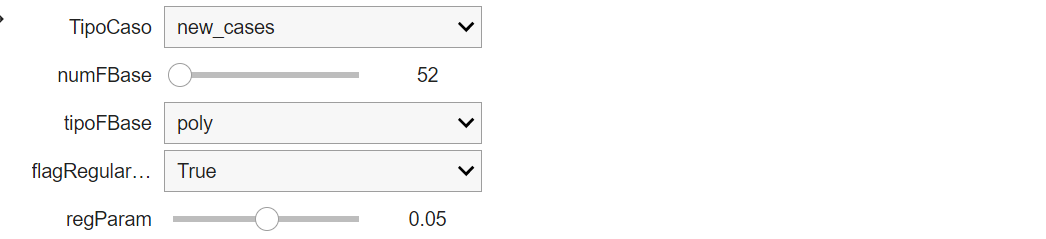


El limite de funciones base es de 52 polinomial, para que no tienda a infinito aun estando regularizado o sin regularizar  

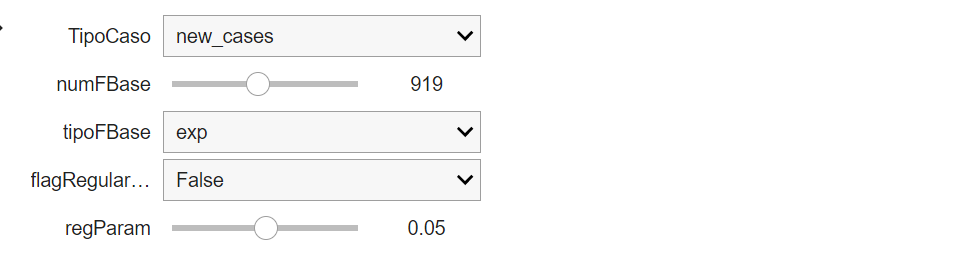


El límite de funciones base es de 919 en la función exponencial y sin regularización, para que no marque valores negativos o tienda a infinito.

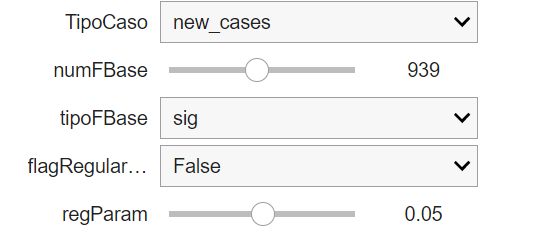

El límite de funciones base es de 939 en la función sigmoidal y sin regularización, para que no marque valores negativos o tienda a infinito.